<a href="https://colab.research.google.com/github/phanimusunuri1234/autompg-neural-network/blob/main/autompg_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [14]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=490152f91eff206ed24f4d9a73f6301412568a6622ae20afe2f55e997c015503
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [71]:
data=pd.read_csv("/content/auto-mpg.csv1.csv",
                 names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car names"])

In [72]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car names
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [73]:
data.isnull().count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car names       398
dtype: int64

In [74]:
data['horsepower'].mean()

102.89447236180905

In [75]:
data['horsepower']=data['horsepower'].replace(0,data['horsepower'].mean())

In [76]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car names
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [30]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771785,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.839340,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.894020,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771785,0.839340,0.894020,1.000000,0.860908,-0.684646,-0.411981,-0.453477
weight,-0.831741,0.896017,0.932824,0.860908,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684646,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411981,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453477,-0.581024,0.205873,0.180662,1.000000


Text(0.5, 1.0, 'Heatmap displaying the relationship between the attributes of the data')

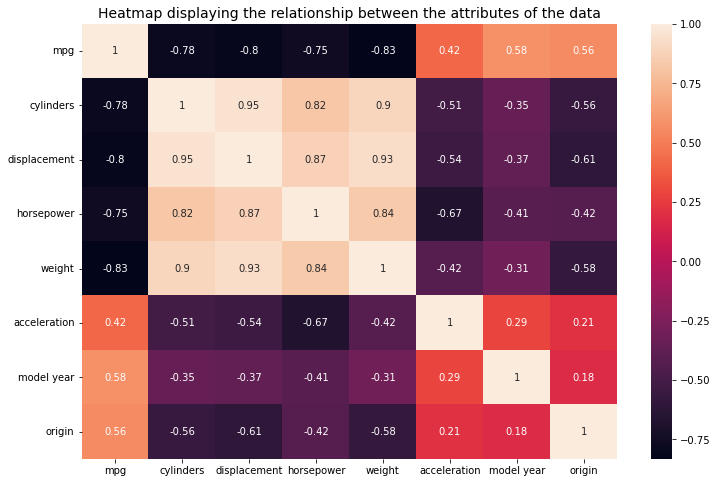

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.title('Heatmap displaying the relationship between the attributes of the data',fontsize=14)


In [63]:
x=data.drop(['mpg','car names','origin','model year'],axis=1)
y=data["mpg"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
tf.random.set_seed(42)

In [65]:
model=tf.keras.Sequential([
                          tf.keras.layers.Dense(10),
                          tf.keras.layers.Dense(8),
                          tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train ,epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 743.4593 - mae: 743.4593
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 267.6352 - mae: 267.6352
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 93.0723 - mae: 93.0723
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 47.4743 - mae: 47.4743
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 26.6047 - mae: 26.6047
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 16.1941 - mae: 16.1941
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 14.6340 - mae: 14.6340
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 13.4063 - mae: 13.4063
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 12.4989 - mae: 12.4989
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 12.6368 - mae: 12.6368
Epoch 11/100
10/10 [===============

In [66]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 5.7176 - mae: 5.7176


[5.7175984382629395, 5.7175984382629395]

Text(0.5, 0, 'epochs')

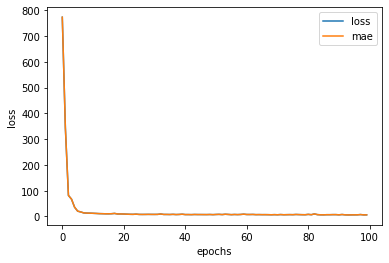

In [57]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [68]:
model2=tf.keras.Sequential([
                          tf.keras.layers.Dense(7),
                          tf.keras.layers.Dense(3),
                          tf.keras.layers.Dense(1)
])
model2.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

history= model2.fit(x_train, y_train ,epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 2313.3813 - mae: 2313.3813
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 2042.3864 - mae: 2042.3864
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1774.4497 - mae: 1774.4497
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1505.0092 - mae: 1505.0092
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1233.4376 - mae: 1233.4376
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 952.7247 - mae: 952.7247
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 661.4456 - mae: 661.4456
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 356.8837 - mae: 356.8837
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 82.5390 - mae: 82.5390
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 76.3436 - mae: 76.3436
Epoch 11/100


In [44]:
from ann_visualizer.visualize import ann_viz;

f=ann_viz(model2, title="My first neural network",view=True)

In [38]:
print(f)

None


In [22]:
from keras.utils.vis_utils import plot_model

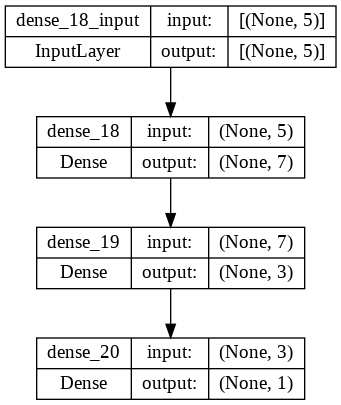

In [39]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [69]:
model2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 7)                 42        
                                                                 
 dense_76 (Dense)            (None, 3)                 24        
                                                                 
 dense_77 (Dense)            (None, 1)                 4         
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [47]:
model=tf.keras.Sequential([
                          tf.keras.layers.Dense(7),
                          tf.keras.layers.Dense(3),
                          tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mse,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mse"])

history= model.fit(x_train, y_train ,epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 6ms/step - loss: nan - mse: nan              
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 12/100
10/